In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions to represent a single grayscale channel
x_train = np.expand_dims(x_train, axis=-1) #the last dimension
x_test = np.expand_dims(x_test, axis=-1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model = Sequential([
    #window size =32
    #kernel_size = step size = (3, 3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # (2, 2) = pool_size: integer or tuple of 2 integers, window size over which to take the maximum
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              #sparse_categorical_crossentropy (scce) produces a category index of the most likely matching category.
              metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4811 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3178 - accuracy: 0.8841
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2702 - accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2397 - accuracy: 0.9110
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2121 - accuracy: 0.9219
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1928 - accuracy: 0.9277
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1752 - accuracy: 0.9341
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1593 - accuracy: 0.9402
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1451 - accuracy: 0.9461
Epoch 10/10
1875/1875 [==============================] - 40s 21m

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy: ',test_acc)


313/313 [==============================] - 3s 6ms/step - loss: 0.2714 - accuracy: 0.9082
Test loss: 0.2714446783065796
Test accuracy:  0.9082000255584717


In [9]:
model.save('fashion_model.h5')
# Save the trained model

In [10]:
from tensorflow.keras.models import load_model
model = load_model('fashion_model.h5')
# Load the trained model

In [18]:
# Select 5 random indices from the test set
# size = no.of items
indices = np.random.randint(0, len(x_test), size=5)
print(indices)

[7091 4052 5207 9760  321]


In [22]:
# Get the corresponding images and labels
sample_images = x_test[indices]
sample_labels = y_test[indices]

In [23]:
predictions = model.predict(sample_images)

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
# argmax() function returns indices of the max element of the array in a particular axis. 
predicted_labels = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[label] for label in predicted_labels]

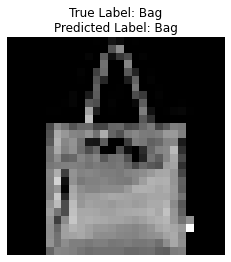

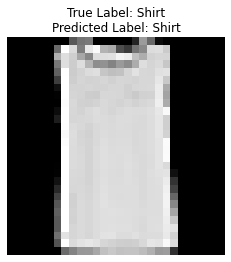

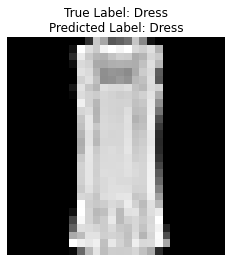

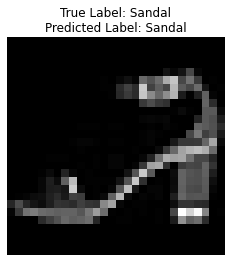

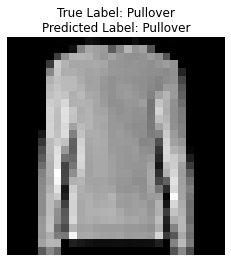

In [30]:
for i in range(len(sample_images)):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {class_names[sample_labels[i]]}\nPredicted Label: {predicted_class_names[i]}')
    plt.axis('off')
    plt.show()